In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 20ms/step - loss: 0.6924 - accuracy: 0.5387 - val_loss: 0.6920 - val_accuracy: 0.5506
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6907 - accuracy: 0.5725 - val_loss: 0.6898 - val_accuracy: 0.5920
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6872 - accuracy: 0.6198 - val_loss: 0.6849 - val_accuracy: 0.6206
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6744 - accuracy: 0.6045 - val_loss: 0.6595 - val_accuracy: 0.5812
Epoch 5/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6249 - accuracy: 0.6832 - val_loss: 0.6102 - val_accuracy: 0.7314
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5908 - accuracy: 0.7427 - val_loss: 0.5867 - val_accuracy: 0.7394
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5717 - accuracy: 0.7537 - val_loss: 0.5741 - val_accuracy:

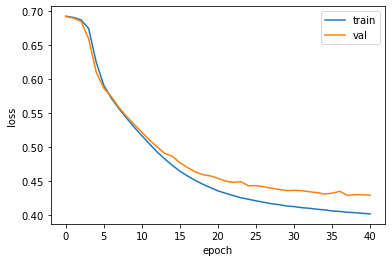

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 25ms/step - loss: 0.6921 - accuracy: 0.5612 - val_loss: 0.6912 - val_accuracy: 0.5960
Epoch 2/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6889 - accuracy: 0.6166 - val_loss: 0.6861 - val_accuracy: 0.6486
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6772 - accuracy: 0.6439 - val_loss: 0.6605 - val_accuracy: 0.6368
Epoch 4/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6313 - accuracy: 0.6948 - val_loss: 0.6072 - val_accuracy: 0.7264
Epoch 5/100
313/313 [==============================] - 8s 27ms/step - loss: 0.5975 - accuracy: 0.7309 - val_loss: 0.5892 - val_accuracy: 0.7280
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5781 - accuracy: 0.7411 - val_loss: 0.5702 - val_accuracy: 0.7408
Epoch 7/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5616 - accuracy: 0.7515 - val_loss: 0.5542 - val_accuracy:

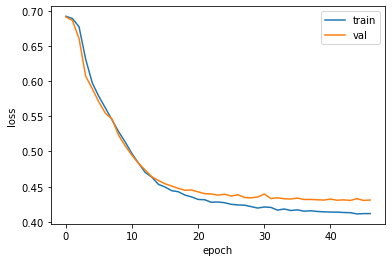

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

2개의 층 연결하기

In [11]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-lstm-2layer-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 52ms/step - loss: 0.6928 - accuracy: 0.5259 - val_loss: 0.6922 - val_accuracy: 0.5820
Epoch 2/100
313/313 [==============================] - 18s 59ms/step - loss: 0.6903 - accuracy: 0.6108 - val_loss: 0.6869 - val_accuracy: 0.6442
Epoch 3/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6711 - accuracy: 0.6310 - val_loss: 0.6361 - val_accuracy: 0.6746
Epoch 4/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6012 - accuracy: 0.7068 - val_loss: 0.5699 - val_accuracy: 0.7334
Epoch 5/100
313/313 [==============================] - 19s 60ms/step - loss: 0.5520 - accuracy: 0.7414 - val_loss: 0.5324 - val_accuracy: 0.7444
Epoch 6/100
313/313 [==============================] - 22s 70ms/step - loss: 0.5240 - accuracy: 0.7534 - val_loss: 0.5132 - val_accuracy: 0.7556
Epoch 7/100
313/313 [==============================] - 32s 101ms/step - loss: 0.5062 - accuracy: 0.7653 - val_loss: 0.4946 - val_a

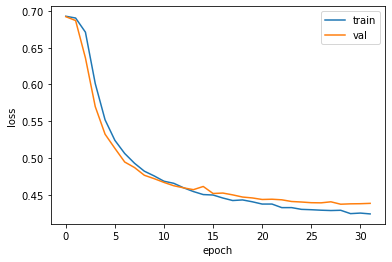

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

GRU

In [18]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 29ms/step - loss: 0.6926 - accuracy: 0.5243 - val_loss: 0.6921 - val_accuracy: 0.5418
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6906 - accuracy: 0.5682 - val_loss: 0.6899 - val_accuracy: 0.5658
Epoch 3/100
313/313 [==============================] - 21s 69ms/step - loss: 0.6877 - accuracy: 0.5957 - val_loss: 0.6867 - val_accuracy: 0.5874
Epoch 4/100
313/313 [==============================] - 28s 91ms/step - loss: 0.6831 - accuracy: 0.6119 - val_loss: 0.6816 - val_accuracy: 0.5948
Epoch 5/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6763 - accuracy: 0.6206 - val_loss: 0.6740 - val_accuracy: 0.6092
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6659 - accuracy: 0.6328 - val_loss: 0.6628 - val_accuracy: 0.6226
Epoch 7/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6501 - accuracy: 0.6485 - val_loss: 0.6450 - val_ac

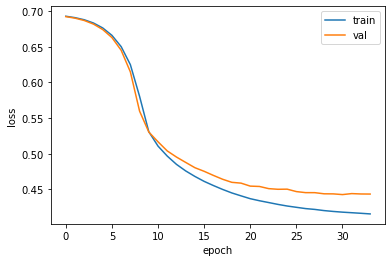

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [23]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-dropout-lstm-2layer-model.h5')
rnn_model.evaluate(val_seq, val_target)

157/157 [==============================] - 3s 14ms/step - loss: 0.4384 - accuracy: 0.7998


[0.4383954107761383, 0.7997999787330627]